## Tutorial Setup

### Check your install

In [7]:
import numpy

In [8]:
import scipy

In [9]:
import matplotlib

In [10]:
import sklearn

In [11]:
import psutil

In [12]:
import pandas

In [13]:
import IPython.parallel

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


Finding the location of an installed package and its version:

In [14]:
numpy.__path__

['/usr/local/anaconda3/lib/python3.7/site-packages/numpy']

In [15]:
numpy.__version__

'1.16.2'

## A NumPy primer

### NumPy array dtypes and shapes

In [18]:
import numpy as np

In [19]:
a = np.array([1, 2, 3])

a

array([1, 2, 3])

In [24]:
b = np.array([[0, 2, 4], [1, 3, 5]])

b

array([[0, 2, 4],
       [1, 3, 5]])

In [25]:
b.shape, a.shape

((2, 3), (3,))

In [26]:
b.dtype, a.dtype

(dtype('int64'), dtype('int64'))

In [27]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [28]:
np.ones(shape=(3, 4), dtype=np.int32)

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=int32)

### Common array operations

In [29]:
c = b * 0.5

c

array([[0. , 1. , 2. ],
       [0.5, 1.5, 2.5]])

In [31]:
c.shape, c.dtype

((2, 3), dtype('float64'))

In [32]:
a

array([1, 2, 3])

In [33]:
d = a + c

d

array([[1. , 3. , 5. ],
       [1.5, 3.5, 5.5]])

In [34]:
d[0]

array([1., 3., 5.])

In [35]:
d[0, 0]

1.0

In [36]:
d[:, 0]

array([1. , 1.5])

In [37]:
d.sum()

19.5

In [38]:
d.mean()

3.25

In [39]:
d.sum(axis=0)

array([ 2.5,  6.5, 10.5])

In [40]:
d.mean(axis=1)

array([3. , 3.5])

### Reshaping and inplace update

In [42]:
e = np.arange(12)

In [43]:
e

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [44]:
f = e.reshape(3, 4)

In [45]:
f

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [46]:
e 

# diff. w/ pandas!

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [47]:
e[5:] = 0

In [48]:
e

array([0, 1, 2, 3, 4, 0, 0, 0, 0, 0, 0, 0])

In [49]:
f

# e changes, f changes again. 

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

### Combining arrays

In [50]:
a


array([1, 2, 3])

In [51]:
b

array([[0, 2, 4],
       [1, 3, 5]])

In [52]:
b.T

array([[0, 1],
       [2, 3],
       [4, 5]])

In [53]:
d

array([[1. , 3. , 5. ],
       [1.5, 3.5, 5.5]])

In [54]:
print(np.concatenate([a, a, a]))

# works differently for arrays and matrix !

print(np.concatenate([b,b]))

[1 2 3 1 2 3 1 2 3]
[[0 2 4]
 [1 3 5]
 [0 2 4]
 [1 3 5]]


In [55]:
print(np.vstack([a, b, d]))

# works same!

print(np.vstack([a, a]))

[[1.  2.  3. ]
 [0.  2.  4. ]
 [1.  3.  5. ]
 [1.  3.  5. ]
 [1.5 3.5 5.5]]
[[1 2 3]
 [1 2 3]]


In [56]:
print(np.hstack([b, d]))

# works same!

print(np.hstack([a, a]))

[[0.  2.  4.  1.  3.  5. ]
 [1.  3.  5.  1.5 3.5 5.5]]
[1 2 3 1 2 3]


## A Matplotlib primer

In [57]:
%matplotlib inline

In [58]:
import matplotlib.pyplot as plt

In [85]:
x = np.linspace(0, 2, 20) # 2/10 = 0.2

x

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

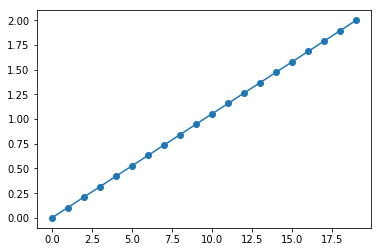

In [86]:
plt.plot(x, 'o-');

### vectorize f for numpy arrays
- check scipy.special.expit \
- , then check numpy 
- , if not use custom function to reach matrix

In [95]:
import math

k = lambda i: i ** 2
exponential = lambda i: math.exp(i)   # gives error size-1 array conversion... so vectorize it!
sigmoid = lambda i: 1 / (1 + math.exp(-i))

exponential_v = np.vectorize(exponential)   # we should have used np.exp(x).. it is faster.
sigmoid_v = np.vectorize(sigmoid)

exponential_v(x), sigmoid_v(x)

(array([1.        , 1.11100294, 1.23432754, 1.37134152, 1.52356446,
        1.6926846 , 1.88057757, 2.08932721, 2.32124868, 2.57891411,
        2.86518116, 3.18322469, 3.53657199, 3.92914189, 4.36528819,
        4.84984802, 5.38819541, 5.98630095, 6.65079796, 7.3890561 ]),
 array([0.5       , 0.52629152, 0.55243804, 0.57829777, 0.60373511,
        0.62862342, 0.6528474 , 0.67630493, 0.69890842, 0.72058564,
        0.74127991, 0.76094997, 0.77956924, 0.79712493, 0.81361672,
        0.82905539, 0.84346127, 0.85686274, 0.86929468, 0.88079708]))

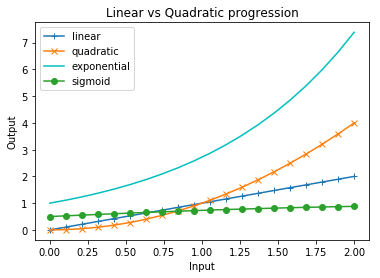

In [97]:
import math 

plt.plot(x, x, '+-', label='linear')
plt.plot(x, x ** 2, 'x-', label='quadratic')
plt.plot(x, exponential_v(x), 'c-', label='exponential')
plt.plot(x, sigmoid_v(x), 'o-', label='sigmoid')


plt.legend(loc='best')
plt.title('Linear vs Quadratic progression')
plt.xlabel('Input')
plt.ylabel('Output');

In [98]:
samples = np.random.normal(loc=1.0, scale=0.5, size=1000)

In [99]:
samples.shape, samples.dtype

((1000,), dtype('float64'))

In [102]:
samples[:30]

array([1.64796294, 1.81911207, 0.74120951, 0.79461341, 1.23651198,
       0.92462585, 0.38558133, 1.00575051, 0.40594601, 0.18476619,
       1.29477263, 1.52097645, 1.43557794, 0.62578892, 0.71758068,
       1.14317878, 0.85940053, 1.0823378 , 1.21873709, 1.33349828,
       0.58247038, 1.38442639, 1.15455333, 0.7681832 , 1.49529364,
       0.8310732 , 1.6988913 , 1.33266279, 0.99144215, 0.62831752])

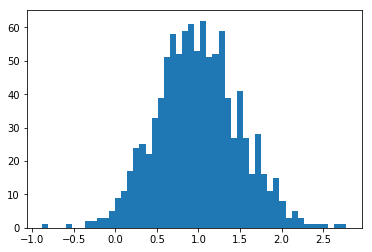

In [105]:
plt.hist(samples, bins=50);

In [107]:
samples_1 = np.random.normal(loc=1, scale=.5, size=10000)    # normal dist. 
samples_2 = np.random.standard_t(df=10, size=10000)          # t-distribution

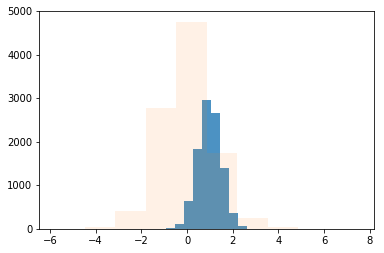

In [117]:
plt.hist(samples_1, alpha=0.8);
plt.hist(samples_2, alpha=0.1);

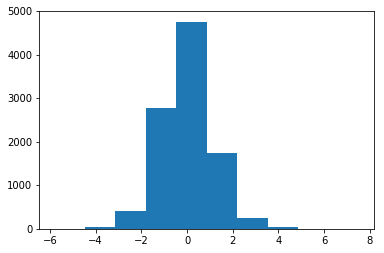

In [109]:
plt.hist(samples_2);

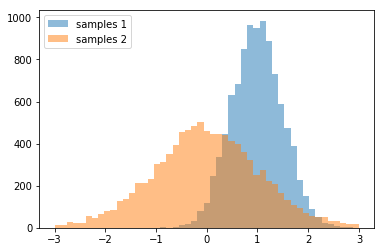

In [111]:
bins = np.linspace(-3, 3, 50)
_ = plt.hist(samples_1, bins=bins, alpha=0.5, label='samples 1')
_ = plt.hist(samples_2, bins=bins, alpha=0.5, label='samples 2')
plt.legend(loc='upper left');

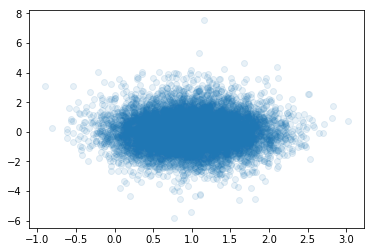

In [112]:
plt.scatter(samples_1, samples_2, alpha=0.1);